<img src="http://drive.google.com/uc?export=view&id=1tpOCamr9aWz817atPnyXus8w5gJ3mIts" width=500px>

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Mobile Phone Review Analysis

## Context

The product companies can utilize the detailed review comments to gather insights from the end user. Most of the products are sold via e-commerce sites like Flipkart or Amazon where customers can buy a product and give their review about the product on the web site. 
Product managers can identify the relevant reviews from the website and run a sentiment analysis tool to understand what the sentiments of the customer are. Based on their sentiments, they can identify what users think of the current product. Are they happy? Discontent? 
They can also come up with a document that lists the features, the team needs to focus on for making the product better. 

## Objective

Given the review data rating label, we will try to get insights about various brands and their ratings using text analytics and build a model to predict the rating and overall sentiment. 


### Package version

- tensorflow==2.3.0
- scikit-learn==0.22.2.post1
- pandas==1.0.5
- numpy==1.18.5
- matplotlib==3.2.2
- google==2.0.3

### Data Dictionary 

product_data.csv - contains product details
- 'asin',  - Product ASIN
- 'brand', - Product Brand
- 'title', - Product Title
- 'url',  - Product URL
- 'image', - Product Image URL
- 'rating',- Product Avg. Rating
- 'reviewUrl' - Product Review Page URL
- 'totalReviews' - Product Total Reviews
- ‘price’ - Product Price ($)
- ‘originalPrice’ - Product Original Price ($)
 
reviews.csv  - contains user review details
 
- 'asin' - Product ASIN
- 'name' - Reviewer Name
- 'rating' - Reviewer Rating (scale 1 to 5)
- 'date'  - Review Date
- 'verified' - Valid Customer
- 'title'  - Review Title
- 'body'  - Review Content
- 'helpfulVotes  - Helpful Feedbacks


## Table of Content

1. Import Libraries

2. Setting options

3. Read Data

4. Data Analysis and EDA

5. Text preprocessing and Vectorization

6. Model building

7. Conclusion and Interpretation

## 1. Import Libraries

Let us start by mounting the drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Let us check for the version of installed tensorflow.

In [ ]:
# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns
import tensorflow 
print(tensorflow.__version__)

2.5.0


## 2. Setting Options

In [ ]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

## 3. Read Data

### 3.1 Read the provided CSVs and check 5 random samples and shape to understand the datasets

In [ ]:
dfproduct = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/NLP/product_data.csv") 
dfreview = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/NLP/reviews.csv") 


In [ ]:
dfproduct.sample(5)

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,price,originalPrice
185,B01N2HPFWK,Google,"Google Pixel XL (128GB, 4GB RAM) 5.5"" AMOLED H...",https://www.amazon.com/Google-Display-Factory-...,https://m.media-amazon.com/images/I/61Yz5m69Ik...,3.9000000,https://www.amazon.com/product-reviews/B01N2HPFWK,87,329.9900000,399.9900000
509,B07MNZWW37,HUAWEI,Huawei Mate 20 Pro LYA-L29 128GB + 6GB - Facto...,https://www.amazon.com/Huawei-Mate-LYA-L29-128...,https://m.media-amazon.com/images/I/5103NfGcH2...,4.5000000,https://www.amazon.com/product-reviews/B07MNZWW37,2,489.9900000,0.0000000
82,B00OEK6TWU,Samsung,Samsung Galaxy Note 3 N900A 32GB Unlocked GSM ...,https://www.amazon.com/Samsung-Galaxy-Note-Unl...,https://m.media-amazon.com/images/I/91Q7P86ef5...,3.6000000,https://www.amazon.com/product-reviews/B00OEK6TWU,431,194.0000000,0.0000000
409,B07F3YGL26,Xiaomi,Xiaomi Redmi S2 (32GB 3GB RAM) with AI Smart S...,https://www.amazon.com/Cameras-Display-Unlocke...,https://m.media-amazon.com/images/I/41NTLwPYT6...,5.0000000,https://www.amazon.com/product-reviews/B07F3YGL26,1,139.9900000,155.0000000
645,B07V5NSD8N,Samsung,Samsung Galaxy A80 SM-A805F/DS Dual Sim (Facto...,https://www.amazon.com/Samsung-SM-A805F-DS-Fac...,https://m.media-amazon.com/images/I/61xlXfp3Op...,4.7000000,https://www.amazon.com/product-reviews/B07V5NSD8N,17,499.9900000,0.0000000


In [ ]:
dfreview.sample(5)

,asin,name,rating,date,verified,title,body,helpfulVotes
26327,B01LY3OB8D,B.m,5,"May 19, 2018",True,An amazing phone,I love the Google pixel it's a great phone I h...,2.0000000
59463,B07PY52GVP,Murtaza Rizvi,5,"August 10, 2019",True,"It can easily be for $800, but it's not! Wow",Current owner of S8(broke) iPhone 10XS (don't ...,2.0000000
11430,B00KM10ITK,photozrus,4,"May 3, 2015",True,Four Stars,I'm used to an android still learning this it'...,3.0000000
56314,B07MN8QTK1,anna oddo,5,"November 21, 2019",True,Good phone awesome price,"Works on Google fi in the US. No problems, and...",nan
63648,B07RWFC6NY,Matthew C.,5,"November 14, 2019",True,Amazing,Great phone,nan


In [ ]:
dfproduct.shape

(720, 10)

- There are 720 records with 10 attributes in product dataset

In [ ]:
dfreview.shape

(67986, 8)

- There are 67986 reviews with 8 attributes in review dataset. 

## 4.  Data Analysis and EDA

In [ ]:
dfproduct.columns

Index(['asin', 'brand', 'title', 'url', 'image', 'rating', 'reviewUrl',
       'totalReviews', 'price', 'originalPrice'],
      dtype='object')

In [ ]:
dfreview.columns

Index(['asin', 'name', 'rating', 'date', 'verified', 'title', 'body',
       'helpfulVotes'],
      dtype='object')

### 4.1 Drop unnecessary columns like 'url', 'image' from the product_data

In [ ]:
col=["url","image","reviewUrl"]
dfproduct.drop(col,axis=1,inplace=True)

### 4.2 Check statistical summary of both datasets. Note:- Include both numerical and object type columns.

In [ ]:
dfproduct.describe(include="all")

,asin,brand,title,rating,totalReviews,price,originalPrice
count,720,716,720,720.0000000,720.0000000,720.0000000,720.0000000
unique,720,10,718,nan,nan,nan,nan
top,B0096QYH80,Samsung,"Apple iPhone 6S, 64GB, Rose Gold - For AT&T / ...",nan,nan,nan,nan
freq,1,346,2,nan,nan,nan,nan
mean,NaN,NaN,NaN,3.7137500,105.6791667,234.9489306,63.6907778
std,NaN,NaN,NaN,0.7160138,167.6011014,200.0084407,172.4053696
min,NaN,NaN,NaN,1.0000000,1.0000000,0.0000000,0.0000000
25%,NaN,NaN,NaN,3.3000000,7.0000000,97.5125000,0.0000000
50%,NaN,NaN,NaN,3.8000000,32.0000000,188.9750000,0.0000000
75%,NaN,NaN,NaN,4.1000000,122.2500000,336.7250000,0.0000000


In [ ]:
dfreview.describe(include="all")

,asin,name,rating,date,verified,title,body,helpfulVotes
count,67986,67984,67986.0000000,67986,67986,67972,67965,27215.0000000
unique,720,47323,nan,2983,2,41489,59811,nan
top,B00F2SKPIM,Amazon Customer,nan,"December 11, 2019",True,Five Stars,Good,nan
freq,981,6507,nan,234,61225,6043,303,nan
mean,NaN,NaN,3.8079163,NaN,NaN,NaN,NaN,8.2296895
std,NaN,NaN,1.5829058,NaN,NaN,NaN,NaN,31.9548772
min,NaN,NaN,1.0000000,NaN,NaN,NaN,NaN,1.0000000
25%,NaN,NaN,3.0000000,NaN,NaN,NaN,NaN,1.0000000
50%,NaN,NaN,5.0000000,NaN,NaN,NaN,NaN,2.0000000
75%,NaN,NaN,5.0000000,NaN,NaN,NaN,NaN,5.0000000


In [ ]:
dfproduct.isnull().sum()

asin             0
brand            4
title            0
rating           0
totalReviews     0
price            0
originalPrice    0
dtype: int64

### 4.3 From the above statistical summary, write inferences like count of unique products, top brand, top title, range of rating, price range, etc

- There are 720 unique products listed
- 10 unique brands are listed.
- 4 missing values in brand attribute in dataset. 
- Ratings are the range between 1 to 5. Mean rating for the product is 3.71
- Price range between 0 to 999.99
- Top brand is Samsung.
- Top title is Apple iPhone 6S, 64GB, Rose Gold - For AT&T / ...


### 4.4 Analyze the distribution of ratings and other categorical features like brand, etc

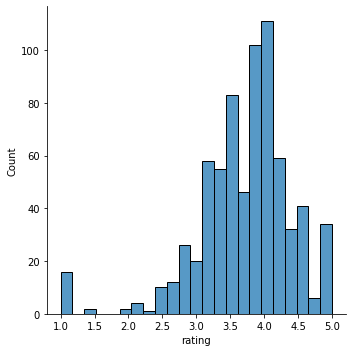

In [ ]:
sns.displot(dfproduct["rating"])

- There are more reviews having 4.0 rating. 

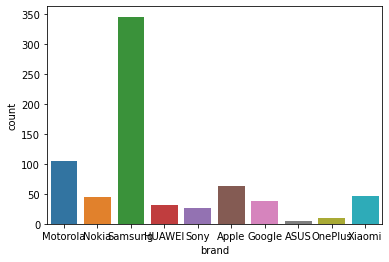

In [ ]:
sns.countplot(dfproduct["brand"])

In [ ]:
dfproduct["brand"].value_counts() / len(dfproduct)*100

Samsung    48.0555556
Motorola   14.5833333
Apple       8.7500000
Xiaomi      6.3888889
Nokia       6.1111111
Google      5.2777778
HUAWEI      4.4444444
Sony        3.7500000
OnePlus     1.3888889
ASUS        0.6944444
Name: brand, dtype: float64

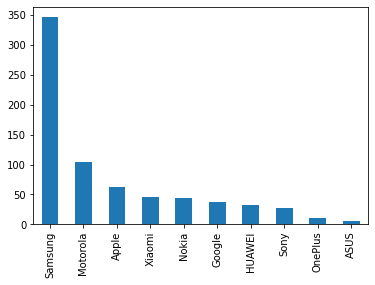

In [ ]:
dfproduct["brand"].value_counts().plot(kind='bar')

- There are more products in Samsung brand

### 4.5 Display average rating per brand

In [ ]:
dfproduct.groupby('brand').mean()['rating'].sort_values(ascending=False)

brand
Xiaomi     4.4152174
HUAWEI     4.0218750
ASUS       3.8600000
Sony       3.7888889
Apple      3.7825397
Google     3.7710526
Motorola   3.6438095
Samsung    3.6326590
OnePlus    3.5800000
Nokia      3.3863636
Name: rating, dtype: float64

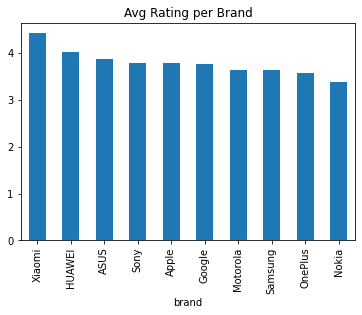

In [ ]:
dfproduct.groupby('brand').mean()['rating'].sort_values(ascending=False).plot(kind='bar', title='Avg Rating per Brand')

- Xiaomi brand has highest average rating.

### 4.6 Display average price per brand

In [ ]:
dfproduct.groupby('brand').mean()['price'].sort_values(ascending=False)

brand
OnePlus    426.1960000
Sony       332.7248148
ASUS       309.6860000
Apple      303.5811111
Samsung    256.5272543
Google     241.8676316
HUAWEI     218.8290625
Xiaomi     214.9676087
Motorola   139.1210476
Nokia      111.4438636
Name: price, dtype: float64

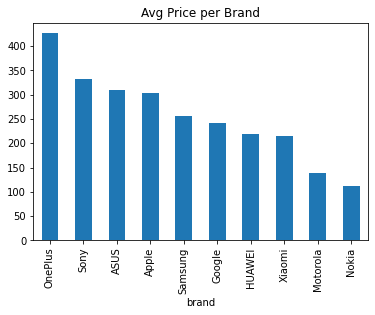

In [ ]:
dfproduct.groupby('brand').mean()['price'].sort_values(ascending=False).plot(kind='bar', title='Avg Price per Brand')

- OnePlus brand has highest avaerage price.

### 4.7 Display average 'totalReviews' per brand

In [ ]:
dfproduct.groupby('brand').mean()['totalReviews'].sort_values(ascending=False)

brand
Nokia      140.5000000
Sony       122.6666667
Xiaomi     121.1739130
Google     111.5263158
Samsung    108.9624277
Apple      100.2380952
Motorola    89.7047619
HUAWEI      77.0937500
ASUS        52.6000000
OnePlus     40.6000000
Name: totalReviews, dtype: float64

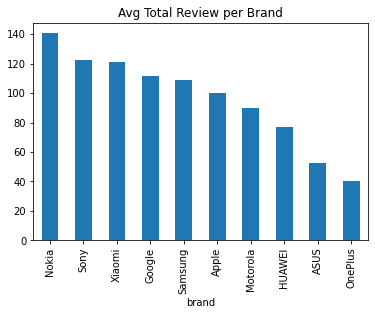

In [ ]:
dfproduct.groupby('brand').mean()['totalReviews'].sort_values(ascending=False).plot(kind='bar', title='Avg Total Review per Brand')

- Nokia brand has highest average reviews.

### 4.8 Merge two datasets using 'asin' and check the shape of the final dataset

In [ ]:
df = pd.merge(dfreview, dfproduct,how="left", left_on='asin', right_on='asin')
df.head( )

,asin,name,rating_x,date,verified,title_x,body,helpfulVotes,brand,title_y,rating_y,totalReviews,price,originalPrice
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0000000,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0000000,14,0.0000000,0.0000000
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0000000,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0000000,14,0.0000000,0.0000000
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0000000,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0000000,14,0.0000000,0.0000000
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0000000,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0000000,14,0.0000000,0.0000000
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0000000,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0000000,14,0.0000000,0.0000000


In [ ]:
df.shape

(67986, 14)

- There are 67986 records and 14 attributes after merging the product and review datasets. 

### 4.9 Rename important features with appropriate names.
Imortant features - "rating_x": "user_rating", "title_x": "review_title", "title_y": "item_title", "rating_y": "overall_rating"

In [ ]:
df.rename(columns={"rating_x": "user_rating", "title_x": "review_title", "title_y": "item_title", "rating_y": "overall_rating"}, inplace=True)

### 4.10 Select rows having verified reviews and check the shape of the final dataset

In [ ]:
df['verified'].value_counts()

True     61225
False     6761
Name: verified, dtype: int64

In [ ]:
dfv = df[df['verified'] == True]
dfv.shape

(61225, 14)

- There are 61225 verified reviews.

### 4.11 Check the number of reviews for various brands and report the brand that have highest number of reviews

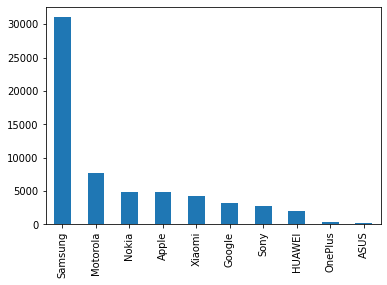

In [ ]:
dfv['brand'].value_counts().plot(kind='bar')

- Samsumg brand has highest number of reviews.

### 4.12 Drop irrelevant columns and keep important features like 'brand','body','price','user_rating','review_title' for further analysis

In [ ]:
col_lst = ['brand','body','price','user_rating','review_title']
df_review = dfv[col_lst]
df_review.head()

,brand,body,price,user_rating,review_title
14,Motorola,DON'T BUY OUT OF SERVICE,49.9500000,1,Stupid phone
17,Motorola,1 star because the phones locked so I have to ...,49.9500000,1,Phones locked
18,Motorola,The product has been very good. I had used thi...,49.9500000,5,Excellent product
21,Motorola,I bought this phone to replace an LG phone tha...,99.9900000,4,"Nice, but"
22,Motorola,I purchased this phone for my AT&T phone repla...,99.9900000,1,It seems it doesn't work with the existing AT&...


### 4.13 Perform univariate analysis. Check distribution of price, user_rating

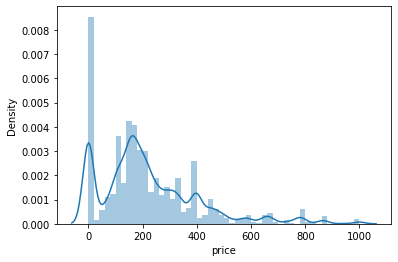

In [ ]:
sns.distplot(df_review['price'])

- Price is 0 for some mobiles. 
- Price between 100 to 300 for most of the mobiles.

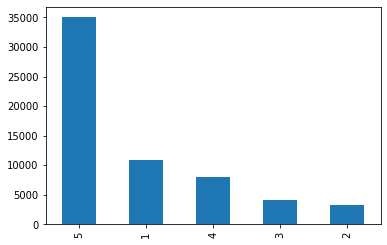

In [ ]:
df_review['user_rating'].value_counts().plot(kind='bar')

- There are more 5 user rating. 

### 4.14 Create a new column called "sentiment". It should have value as 1 (positive) if the user_Rating is greater than 3, value as 0 (neutral) if the user_Rating == 3, and -1 (negative) is the user_Rating is less than 3.

In [ ]:
df_review['sentiment'] = df_review['user_rating'].apply(lambda x : 1 if x > 3 else (0 if x ==3 else -1))

In [ ]:
df_review.sample(5)

,brand,body,price,user_rating,review_title,sentiment
27622,Samsung,"The phone works great, you would think its bra...",169.9500000,4,Great Phone Looks New!,1
66322,Motorola,Updated purchase.,119.9900000,5,"Fantastic phone. Stable, easy set up, great pr...",1
66459,Motorola,Nothing,119.9900000,5,Nothing,1
265,Motorola,I haven't had the phone turned on yet but it a...,0.0000000,5,Christmas gift for my mother in law haven't pu...,1
39365,Nokia,I'm not sure if it's because of the carrier or...,54.9900000,3,Didn't work well on our T-Mobile plan,0


### 4.15 Check frequency distribution of the 'sentiment'

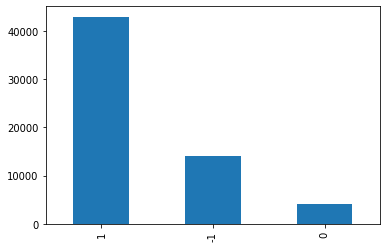

In [ ]:
df_review['sentiment'].value_counts().plot(kind='bar')

- There are more positive reviews

### 4.16 Perform bivariate analysis. Check correlation/crosstab between features and write your inferences.

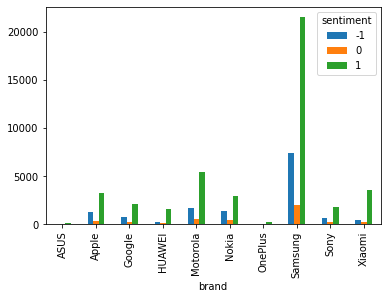

In [ ]:
pd.crosstab(df_review['brand'] , df_review['sentiment']).plot(kind = 'bar')

- Samsung has more positive reviews when compared to other brands. 

## 5. Text Preprocessing and Vectorization

We will analyze the 'body' and 'review_title' to gain more understanding.

We will ppeform the below tasks

- Convert the text into lowercase
- Remove punctuation
- Remove stopwords (English, from nltk corpus)
- Remove other keywords like "phone" and brand name

### 5.1 Change the datatype of the 'body' column to 'str' and convert it into lowercase. Print any two samples and check the output.

In [ ]:
df_review['body'] = df_review['body'].astype('str')

In [ ]:
df_review['body'] = df_review['body'].apply(lambda x: x.lower())
df_review['body'].head()

14                             don't buy out of service
17    1 star because the phones locked so i have to ...
18    the product has been very good. i had used thi...
21    i bought this phone to replace an lg phone tha...
22    i purchased this phone for my at&t phone repla...
Name: body, dtype: object

### 5.2 Remove punctuations from the lowercased 'body' column and display at least two samples.

In [ ]:
df_review['body'] = df_review['body'].str.replace('[^\w\s]','')
df_review['body'].head()

14                              dont buy out of service
17    1 star because the phones locked so i have to ...
18    the product has been very good i had used this...
21    i bought this phone to replace an lg phone tha...
22    i purchased this phone for my att phone replac...
Name: body, dtype: object

### 5.3 Remove stop words from the above pre-processed 'body' column and display at least two samples.

In [ ]:
import nltk

nltk.download('stopwords')
stop_words = set(nltk.corpus.stopwords.words('english'))
print(stop_words)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
{'does', 'wasn', 'its', "wasn't", 'any', 'but', 'some', 'm', 'ain', 'for', 'ourselves', 'with', 'yourself', 'theirs', 'having', 'once', 'themselves', 'your', "mustn't", 'when', 'those', "won't", 'my', 'again', 'yourselves', 'me', 'into', 'after', "aren't", 'isn', 'shouldn', 'not', 'until', "that'll", 'each', 've', 'were', 'needn', 'i', "you're", 'out', 'below', 'o', 'an', 'on', 'herself', 'is', 'all', 'which', 'myself', 'under', 'can', 'this', 'itself', 'ma', 'how', 'at', 'off', 'then', 'hadn', "hasn't", 'because', 'hasn', 'weren', 'have', 'be', 'or', 'now', 'our', "haven't", "couldn't", 'above', 'are', 'between', 'such', 'will', "you'll", 'aren', 'by', "shan't", 'mightn', 'that', 'what', 't', 'won', 'nor', 'himself', 'other', 're', 'too', 'doing', 'here', 'haven', 'couldn', 'ours', 'hers', "hadn't", 'do', "she's", 'same', 'his', 'don', "should've", 'up', 'has', "you'd", 'very

In [ ]:
df_review['keyword'] = df_review['body'].apply(lambda x : " ".join(word for word in x.split() if word not in stop_words))
df_review.head()

,brand,body,price,user_rating,review_title,sentiment,keyword
14,Motorola,dont buy out of service,49.9500000,1,Stupid phone,-1,dont buy service
17,Motorola,1 star because the phones locked so i have to ...,49.9500000,1,Phones locked,-1,1 star phones locked pay additional fees unlock
18,Motorola,the product has been very good i had used this...,49.9500000,5,Excellent product,1,product good used cell phone one projects work...
21,Motorola,i bought this phone to replace an lg phone tha...,99.9900000,4,"Nice, but",1,bought phone replace lg phone didnt like expec...
22,Motorola,i purchased this phone for my att phone replac...,99.9900000,1,It seems it doesn't work with the existing AT&...,-1,purchased phone att phone replacement even tho...


### 5.4 Apply lemmatisation on the above preprocessed text and display a few samples

In [ ]:
nltk.download('wordnet')
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
  return " ".join( lemmatizer.lemmatize(w) for w in text.split())



[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df_review['lemm'] = df_review['keyword'].apply(lambda x: lemmatize_text(x))

In [ ]:
df_review.head()

,brand,body,price,user_rating,review_title,sentiment,keyword,lemm
14,Motorola,dont buy out of service,49.9500000,1,Stupid phone,-1,dont buy service,dont buy service
17,Motorola,1 star because the phones locked so i have to ...,49.9500000,1,Phones locked,-1,1 star phones locked pay additional fees unlock,1 star phone locked pay additional fee unlock
18,Motorola,the product has been very good i had used this...,49.9500000,5,Excellent product,1,product good used cell phone one projects work...,product good used cell phone one project worke...
21,Motorola,i bought this phone to replace an lg phone tha...,99.9900000,4,"Nice, but",1,bought phone replace lg phone didnt like expec...,bought phone replace lg phone didnt like expec...
22,Motorola,i purchased this phone for my att phone replac...,99.9900000,1,It seems it doesn't work with the existing AT&...,-1,purchased phone att phone replacement even tho...,purchased phone att phone replacement even tho...


### 5.5 Write a function to check word frequency of the text

In [ ]:
def word_freq_count(text):
  words = text.split()
  freqdict = {word: words.count(word) for word in words}
  return freqdict

### 5.6 Check word frequency of review having top ratings (sentiment = 1) and display output of few samples

In [ ]:
word_freq = df_review[df_review['sentiment'] == 1]['lemm'].apply(lambda x: word_freq_count(x))

In [ ]:
word_freq.sample(5)

26282    {'work': 1, 'well': 1, 'alot': 1, 'fancy': 1, ...
46959    {'nice': 1, 'phone': 1, 'couple': 1, 'bug': 1,...
43358                 {'good': 2, 'pone': 1, 'service': 1}
46454    {'phone': 1, 'unlocked': 1, 'accepted': 1, 'ne...
11117    {'2': 1, 'yet': 1, 'see': 1, '500600': 1, 'iph...
Name: lemm, dtype: object

### 5.7 Initialize tf-idf vectorizer and transform the preprocessed body text

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidvectorizer = TfidfVectorizer()
review_vectorizer = tfidvectorizer.fit_transform(df_review['lemm'])

### 5.8 Segregate the data into dependent (sentiment) and independent (transformed body using tf-idf) features for building a classifier. 

In [ ]:
X = review_vectorizer
y = df_review['sentiment']

### 5.9 Split the data into Train & Test Sets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
print(X_train.shape, y_train.shape)

(42857, 36034) (42857,)


In [ ]:
print(X_test.shape, y_test.shape)

(18368, 36034) (18368,)


## 6. Model building

### 6.1 Build a random forest classifier to predict the 'sentiment'
### 6.2 Predict on test set
### 6.3 Check accuracy and confusion matrix

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

print("Training Accuracy" , rfc.score(X_train, y_train))
print("Testing Accuracy" , rfc.score(X_test, y_test))


Training Accuracy 0.9955666518888396
Testing Accuracy 0.8574150696864111


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = rfc.predict(X_test)

confusion_matrix(y_pred, y_test)

array([[ 3017,   346,   405],
       [    9,    83,     6],
       [ 1073,   780, 12649]])

In [ ]:
y_test.value_counts()/len(y_test)

 1   0.7110192
-1   0.2231598
 0   0.0658210
Name: sentiment, dtype: float64

In [ ]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

          -1       0.74      0.80      0.77      3768
           0       0.07      0.85      0.13        98
           1       0.97      0.87      0.92     14502

    accuracy                           0.86     18368
   macro avg       0.59      0.84      0.60     18368
weighted avg       0.92      0.86      0.88     18368



## 7. Write your conclusion

- For class -1, 3017 reviews predicted correctly. 346 reviews predicted as 0 and 405 reviews predicted as 1 incorrectly. 
- For class 0, 83 reviews predicted correctly. 9 reviews predicted as -1 and 6 reviews predicted as 1 incorrectly. 
- For class 1, 12649 reviews predicted correctly. 1073 reviews predicted as -1 and 780 reviews predicted as 0 incorrectly. 
-  Recall is score is good for all the classes. 
- Precision score for class 0 is very less. It looks like imbalanced dataset as there are 6% of data available for class 0. 
- Accuracy is good. However it is overfit model since training accuracy (0.99) is higher than test accuracy(0.85)